In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from math import sqrt


newdf = pd.read_excel("C:/Users/CarlosDaniel/3D Objects/Ciencia de datos/Volve production data.xlsx")

In [9]:
newdf.head(400)

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0   2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1   2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2   2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3   2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4   2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   
..         ...            ...                 ...                ...   
395 2015-05-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
396 2015-05-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
397 2015-05-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
398 2015-05-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
399 2015-05-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

     NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0           3420717          VOLVE             369304    MÆRSK INSPIRER   
1           3420717          VOLVE             369304    MÆRSK INSPIRER   
2           3420717          VOLVE             369304    MÆRSK INSPIRER   
3           3420717          VOLVE             369304    MÆRSK INSPIRER   
4           3420717          VOLVE             369304    MÆRSK INSPIRER   
..              ...            ...                ...               ...   
395         3420717          VOLVE             369304    MÆRSK INSPIRER   
396         3420717          VOLVE             369304    MÆRSK INSPIRER   
397         3420717          VOLVE             369304    MÆRSK INSPIRER   
398         3420717          VOLVE             369304    MÆRSK INSPIRER   
399         3420717          VOLVE             369304    MÆRSK INSPIRER   

     ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0              0.0                0.00000  ...              %    0.00000   
1              0.0                    NaN  ...              %    0.00000   
2              0.0                    NaN  ...              %    0.00000   
3              0.0                    NaN  ...              %    0.00000   
4              0.0              310.37614  ...              %   33.09788   
..             ...                    ...  ...            ...        ...   
395            0.0              237.82800  ...              %   80.51082   
396            0.0              243.55864  ...              %   88.78369   
397            0.0              255.88421  ...              %   96.83388   
398            0.0              261.71623  ...              %  100.30207   
399            0.0              265.16785  ...              %  102.44956   

     AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0      0.00000        0.00000          0.0           0.0           0.0   
1      0.00000        0.00000          0.0           0.0           0.0   
2      0.00000        0.00000          0.0           0.0           0.0   
3      0.00000        0.00000          0.0           0.0           0.0   
4     10.47992       33.07195          0.0           0.0           0.0   
..         ...            ...          ...           ...           ...   
395   10.10663       79.06124          0.0           0.0           0.0   
396   10.24014       87.42538          0.0           0.0           0.0   
397    9.68749       95.61401          0.0           0.0           0.0   
398   10.09624       95.37836          0.0           0.0           0.0   
399   10.10935       95.04456          0.0           0.0           0.0   

     BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0            NaN  production         WI  
1            NaN  production         OP  
2            NaN  production         OP  
3            NaN  production         OP  
4            NaN  production         OP  
..           ...         ...        ...  
395          NaN  production         OP  
396          NaN  production         OP  
397          NaN  production         OP  
398          NaN  p

In [448]:
newdf[('BORE_WAT_VOL')]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15629    0.0
15630    0.0
15631    0.0
15632    0.0
15633    NaN
Name: BORE_WAT_VOL, Length: 15634, dtype: float64

In [449]:
#Roundinf off the data to the nearest integer
newdf = np.round(newdf)




In [450]:
newdf.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [451]:
#Los datos están muy sesgados y dependen del pozo, por lo tanto, he usado relleno para completar los valores que faltan
newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')

In [452]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15634 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     15634 non-null  float64       
 10  AVG_DOWNHOLE_TEMPERATURE  15634 non-null  float64       
 11  AVG_DP_TUBING             15634 non-null  float64       
 12  AVG_ANNULUS_PRESS 

In [453]:
#Se lleva a cabo la reducción de dimensionalidad en el marco de datos original
# Eliminación de funciones innecesarias: WELL_BORE_CODE, NPD_WELL_BORE_NAME, NPD_FIELD_NAME, NPD_FIELD_CODE, NPD_FACILITY_CODE, NPD_FACILITY_NAME

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = newdf.drop(to_drop, axis=1)
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_CODE        15634 non-null  int64         
 2   ON_STREAM_HRS             15634 non-null  float64       
 3   AVG_DOWNHOLE_TEMPERATURE  15634 non-null  float64       
 4   AVG_ANNULUS_PRESS         15634 non-null  float64       
 5   AVG_CHOKE_SIZE_P          15634 non-null  float64       
 6   AVG_WHP_P                 15634 non-null  float64       
 7   AVG_WHT_P                 15634 non-null  float64       
 8   DP_CHOKE_SIZE             15634 non-null  float64       
 9   BORE_OIL_VOL              15634 non-null  float64       
 10  BORE_WAT_VOL              15634 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB
None


In [10]:
#Scaling dataset to remove difference in distributions within columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P']])


#Taking the data of wells 2 to 4 since they were the ones with the east number of missing values
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()

In [455]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)

In [456]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [457]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

In [458]:
x_train_final

ON_STREAM_HRS  AVG_DOWNHOLE_TEMPERATURE  AVG_ANNULUS_PRESS  \
3374           0.96                  0.000000           0.433333   
3760           0.96                  0.000000           0.500000   
2900           0.96                  0.000000           0.766667   
2090           0.96                  0.972477           0.400000   
7782           0.96                  0.917431           0.466667   
...             ...                       ...                ...   
5937           0.96                  0.972477           0.000000   
5972           0.96                  0.972477           0.000000   
6136           0.92                  0.954128           0.000000   
1606           0.96                  0.972477           0.366667   
8016           0.00                  0.000000           0.366667   

      AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_WAT_VOL  
3374              1.00   0.248175   0.978723            5.0        4663.0  
3760              1.00   0.240876   0.968085            4.0        4630.0  
2900              0.56   0.350365   0.936170           16.0        3784.0  
2090              0.50   0.605839   0.840426           49.0           7.0  
7782              0.94   0.211679   0.925532            2.0        3346.0  
...                ...        ...        ...            ...           ...  
5937              0.62   0.335766   0.968085           13.0        3374.0  
5972              1.00   0.299270   0.957447            9.0        3359.0  
6136              0.57   0.306569   0.946809           12.0        4301.0  
1606              1.00   0.233577   0.861702            5.0        2145.0  
8016              0.01   0.080292   0.000000            9.0           0.0  

[5093 rows x 8 columns]

In [459]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression()

In [460]:
y_predicha = reg_all.predict(x_test_final)

In [461]:
#Codigo para obtener la r2 en funcion de los datos de prueba.

In [462]:
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_final, y_test_final))

The R2 value for linear regression for oil volume production is 0.55421096556942


In [463]:
#Codigo para calcular el r2  en funcion de los datos reales
#Calcula y devuelve el coeficiente de determinación (R^2), que es una medida de cómo se ajusta el modelo a los datos reales.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [464]:
mse = mean_squared_error(y_test_final, y_predicha)
mae = mean_absolute_error(y_test_final, y_predicha)
r2 = r2_score(y_test_final, y_predicha)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 834971.7357752336
MAE: 706.1909704541716
R^2: 0.55421096556942


In [465]:
print('Model score:', round(reg_all.score(x_test_final, y_test_final),2))
print('Mean absolute error:', round(mean_absolute_error(y_test_final,y_predicha),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test_final,y_predicha)),2))
print('R2:', round(r2_score(y_test_final, y_predicha),2))
print('Model Trained Score:', round(reg_all.score(x_train_final,y_train_final),2))

Model score: 0.55
Mean absolute error: 706.19
Root mean squared error: 913.77
R2: 0.55
Model Trained Score: 0.55


In [466]:
importance = reg_all.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1338.07639
Feature: 1, Score: 280.89200
Feature: 2, Score: -1194.43707
Feature: 3, Score: 48.02134
Feature: 4, Score: 506.57085
Feature: 5, Score: 2572.30477
Feature: 6, Score: 13.05541
Feature: 7, Score: -0.40973


In [467]:
reg_all.coef_

array([ 1.33807639e+03,  2.80892004e+02, -1.19443707e+03,  4.80213352e+01,
        5.06570847e+02,  2.57230477e+03,  1.30554129e+01, -4.09730530e-01])

In [468]:
reg_all.intercept_

-1110.702698660845

In [469]:
print("The Correlation from linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_\".format(reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], reg_all.coef_[7]")

The Correlation from linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_".format(reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], reg_all.coef_[7]


# Regresion Polinomial


In [470]:
# Applying Polynomisl Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train_final)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train_final)
x_pol_test = poly_reg.fit_transform(x_test_final)
X_poly.shape[1]



#print("The R2 value for Ridge regression for oil volume production is",ridge.score(x_test_final, y_test_final))

495

In [471]:
y_pred = lin_reg.predict(x_pol_test)

In [472]:
a =np.array(poly_reg.get_feature_names_out(['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE' ,'BORE_WAT_VOL']))


In [473]:
b = np.array(lin_reg.coef_)

In [474]:
Correlation_Poly = pd.DataFrame({'Coefficients':b, 'Feature Name':a})

In [475]:
pd.set_option('display.max_rows',30)

In [476]:
Correlation_Poly.head(30)

Coefficients                                Feature Name
0      -1.112010                                           1
1     109.924793                               ON_STREAM_HRS
2     -18.781092                    AVG_DOWNHOLE_TEMPERATURE
3     -35.101298                           AVG_ANNULUS_PRESS
4     104.995564                            AVG_CHOKE_SIZE_P
5      17.814685                                   AVG_WHP_P
6      33.775584                                   AVG_WHT_P
7     -13.399634                               DP_CHOKE_SIZE
8      10.718309                                BORE_WAT_VOL
9      84.925147                             ON_STREAM_HRS^2
10     44.904142      ON_STREAM_HRS AVG_DOWNHOLE_TEMPERATURE
11     19.188807             ON_STREAM_HRS AVG_ANNULUS_PRESS
12     88.129769              ON_STREAM_HRS AVG_CHOKE_SIZE_P
13     14.293495                     ON_STREAM_HRS AVG_WHP_P
14     53.003344                     ON_STREAM_HRS AVG_WHT_P
15     72.943583                 ON_STREAM_HRS DP_CHOKE_SIZE
16     -9.427865                  ON_STREAM_HRS BORE_WAT_VOL
17    -20.009674                  AVG_DOWNHOLE_TEMPERATURE^2
18    -34.897948  AVG_DOWNHOLE_TEMPERATURE AVG_ANNULUS_PRESS
19     64.184932   AVG_DOWNHOLE_TEMPERATURE AVG_CHOKE_SIZE_P
20      0.127609          AVG_DOWNHOLE_TEMPERATURE AVG_WHP_P
21    -16.092536          AVG_DOWNHOLE_TEMPERATURE AVG_WHT_P
22     55.618592      AVG_DOWNHOLE_TEMPERATURE DP_CHOKE_SIZE
23    -19.546902       AVG_DOWNHOLE_TEMPERATURE BORE_WAT_VOL
24    -45.047676                         AVG_ANNULUS_PRESS^2
25     26.345757          AVG_ANNULUS_PRESS AVG_CHOKE_SIZE_P
26     -4.048315                 AVG_ANNULUS_PRESS AVG_WHP_P
27    -16.938053                 AVG_ANNULUS_PRESS AVG_WHT_P
28     60.353100             AVG_ANNULUS_PRESS DP_CHOKE_SIZE
29    -10.251659              AVG_ANNULUS_PRESS BORE_WAT_VOL

In [477]:
# get importance
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -1.11201
Feature: 1, Score: 109.92479
Feature: 2, Score: -18.78109
Feature: 3, Score: -35.10130
Feature: 4, Score: 104.99556
Feature: 5, Score: 17.81469
Feature: 6, Score: 33.77558
Feature: 7, Score: -13.39963
Feature: 8, Score: 10.71831
Feature: 9, Score: 84.92515
Feature: 10, Score: 44.90414
Feature: 11, Score: 19.18881
Feature: 12, Score: 88.12977
Feature: 13, Score: 14.29349
Feature: 14, Score: 53.00334
Feature: 15, Score: 72.94358
Feature: 16, Score: -9.42786
Feature: 17, Score: -20.00967
Feature: 18, Score: -34.89795
Feature: 19, Score: 64.18493
Feature: 20, Score: 0.12761
Feature: 21, Score: -16.09254
Feature: 22, Score: 55.61859
Feature: 23, Score: -19.54690
Feature: 24, Score: -45.04768
Feature: 25, Score: 26.34576
Feature: 26, Score: -4.04832
Feature: 27, Score: -16.93805
Feature: 28, Score: 60.35310
Feature: 29, Score: -10.25166
Feature: 30, Score: 84.73736
Feature: 31, Score: 14.51705
Feature: 32, Score: 68.07974
Feature: 33, Score: -16.63830
Feature: 34,

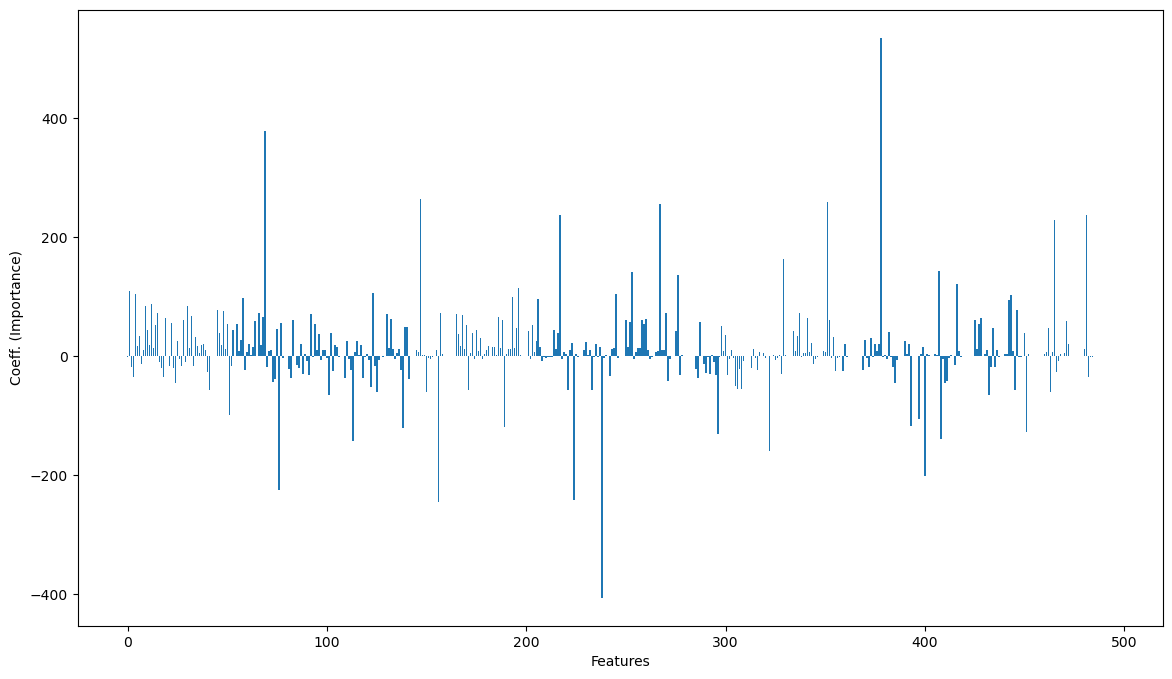

In [478]:
# plot feature importance
plt.figure(figsize = (14,8))
plt.xlabel("Features")
plt.ylabel("Coeff. (Importance)")
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [479]:
y_pred = lin_reg.predict(x_pol_test)

In [480]:
print("The R2 value for Polynomial regression(4th order) for oil volume production is",lin_reg.score(x_pol_test, y_test_final))

The R2 value for Polynomial regression(4th order) for oil volume production is 0.967661599517732


In [481]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from math import sqrt

In [482]:
mse = mean_squared_error(y_test_final, y_pred)
mae = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 60570.46786124737
MAE: 151.34106216468567
R^2: 0.967661599517732


In [483]:
print('Model score:', round(lin_reg.score(x_pol_test, y_test_final),2))
print('Mean absolute error:', round(mean_absolute_error(y_test_final,y_pred),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test_final,y_pred)),2))
print('R2:', round(r2_score(y_test_final, y_pred),2))

Model score: 0.97
Mean absolute error: 151.34
Root mean squared error: 246.11
R2: 0.97


In [484]:
df = pd.DataFrame({'Real Values':y_test_final, 'Predicted Values':y_pred})
df.head(50)

Real Values  Predicted Values
6805        643.0        905.028795
6756        613.0        251.442795
5221       4634.0       4357.270234
4435        688.0        603.341116
5261       3571.0       3623.743840
...           ...               ...
6176        928.0        898.878801
4404        719.0        657.536721
4942          0.0        -24.905099
3628        575.0        449.384555
7692        181.0         83.840784

[50 rows x 2 columns]

# Actual V/S Model Prediction plot for Well No.- 5599

## Regresion Lineal

The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872098


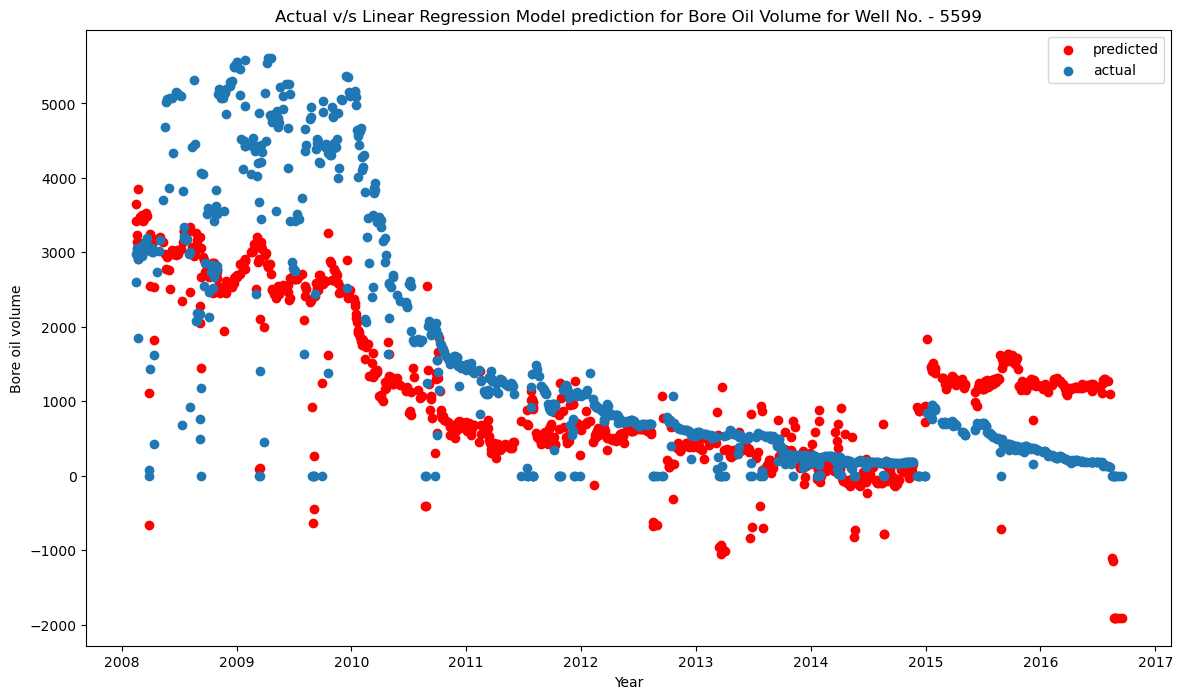

In [485]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_predicha = reg_all.predict(x_test_5599final)
#plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_predicha,label='predicted',color='red')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))

In [486]:
y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", 
reg_all.score(x_test_5599final,y_test_5599_final ))

The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872098


In [487]:
y_predicha = reg_all.predict(x_test_5599final)

In [488]:
y_test_5599_final = y_test_5599['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5599_final, y_predicha)
mae = mean_absolute_error(y_test_5599_final, y_predicha)
r2 = r2_score(y_test_5599_final, y_predicha)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 1204265.5190090504
MAE: 820.764994459359
R^2: 0.5500832938872098


In [489]:
y_test_5599_oil = y_test_5599['BORE_OIL_VOL'] 
r2 = r2_score(y_test_5599_oil, y_predicha)
print("R^2:", r2)

R^2: 0.5500832938872098


The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872098
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is 0.972145386887413


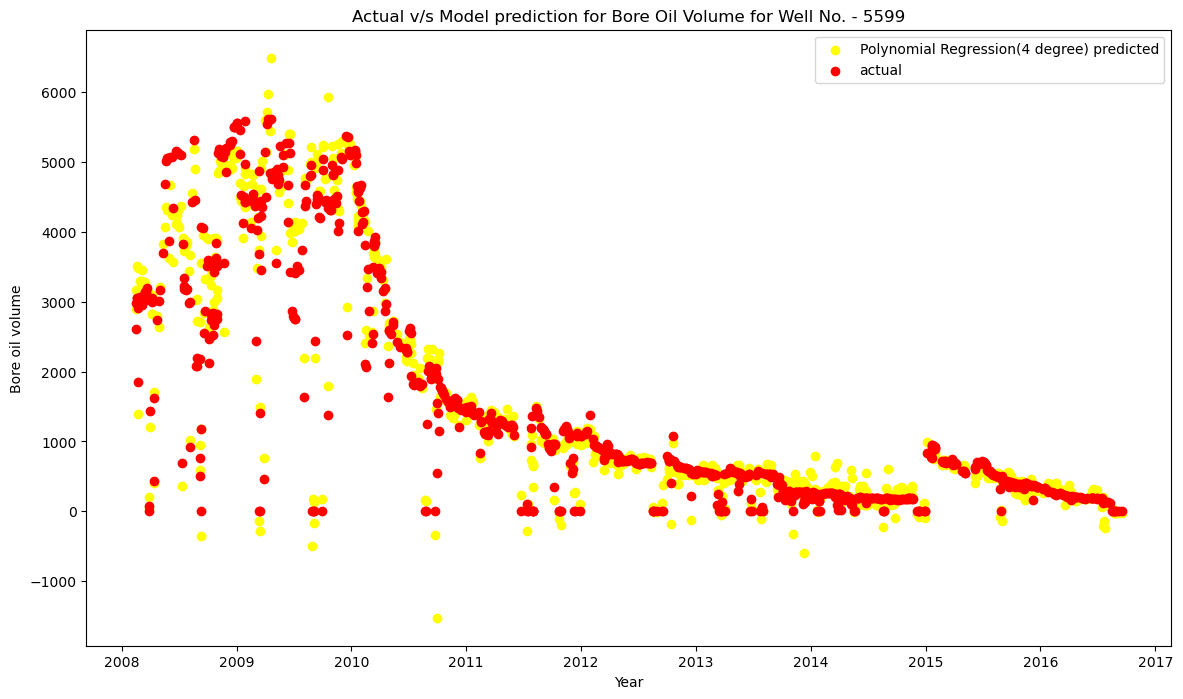

In [490]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5599final)


x_pol_test_5599 = poly_reg.fit_transform(x_test_5599final)
y_poly = lin_reg.predict(x_pol_test_5599)

plt.style.use('default')
plt.figure(figsize = (14,8))
#plt.scatter(X_test_5599["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted',color='yellow')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'yellow')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual', color = 'red')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is", lin_reg.score(x_pol_test_5599,y_test_5599_final))

In [491]:
y_test_5599_final = y_test_5599['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5599_final, y_poly)
mae = mean_absolute_error(y_test_5599_final, y_poly)
r2 = r2_score(y_test_5599_final, y_poly)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 74556.80053902358
MAE: 170.1598950263289
R^2: 0.972145386887413


In [492]:
y_test_5599_final = y_test_5599['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5599_final,y_poly)
mae = mean_absolute_error(y_test_5599_final, y_poly)
r2 = r2_score(y_test_5599_final,y_poly)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 74556.80053902358
MAE: 170.1598950263289
R^2: 0.972145386887413


# Actual V/S Model Prediction plot for Well No.- 5351

# Linear Regression

The R2 value for linear regression for oil volume production is 0.6750225210254913


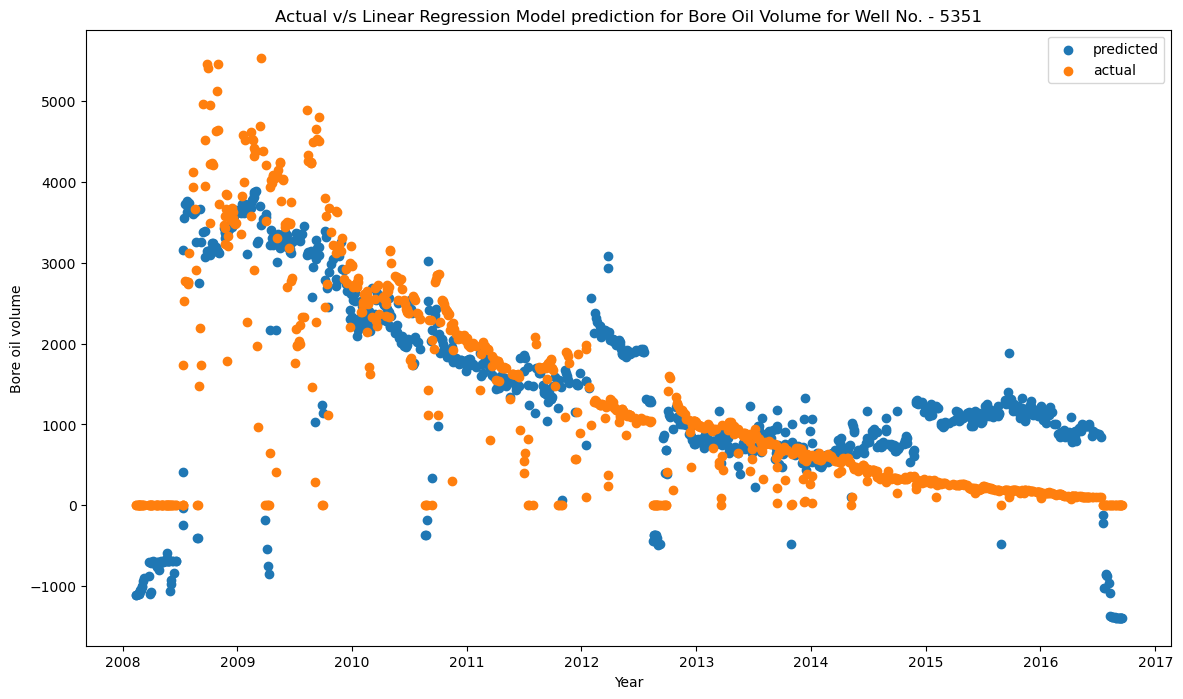

In [493]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5351final)
plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_5351final,y_test_5351_final ))

In [494]:
y_pred = reg_all.predict(x_test_5351final)
y_test_5351_final = y_test_5351['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5351_final, y_pred)
mae = mean_absolute_error(y_test_5351_final, y_pred)
r2 = r2_score(y_test_5351_final, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 541123.1029222196
MAE: 595.7615430353993
R^2: 0.6750225210254913


The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is 0.9690972329118344


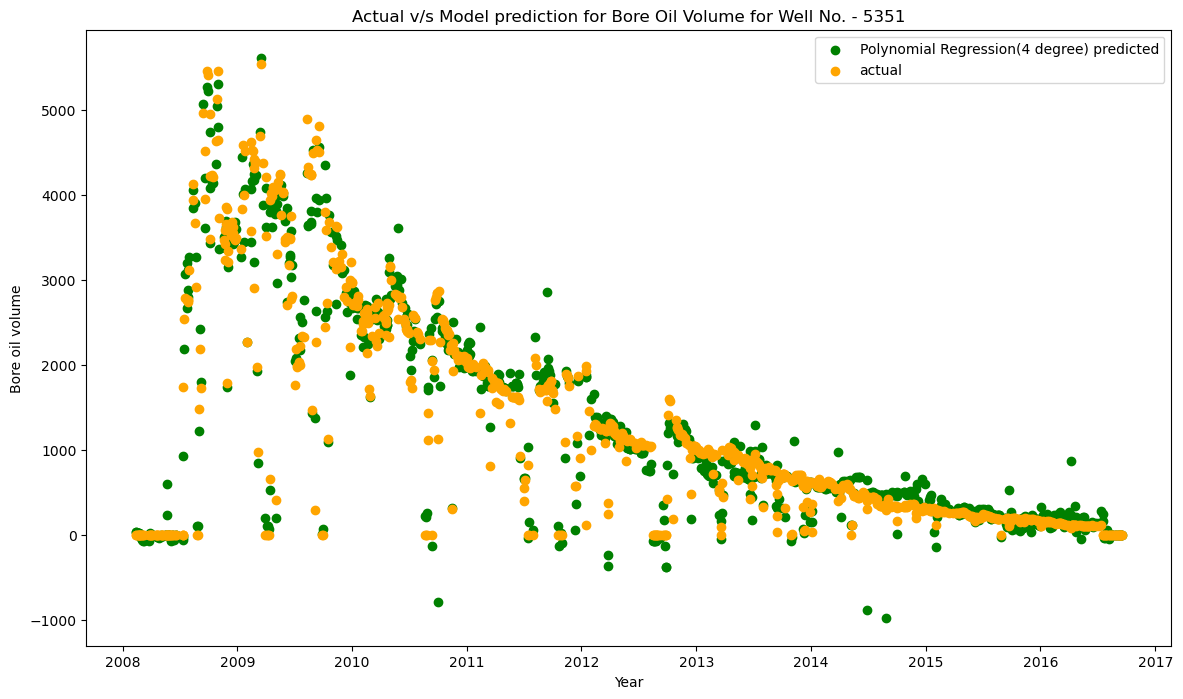

In [495]:
y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5351final)


x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly_5351= lin_reg.predict(x_pol_test_5351)

plt.style.use('default')
plt.figure(figsize = (14,8))
#plt.scatter(X_test_5351["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_poly_5351,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')

#print("The R2 value for linear regression for oil volume production in well 5351 is", reg_all.score(x_test_5351final,y_test_5351_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is", lin_reg.score(x_pol_test_5351,y_test_5351_final ))

In [501]:
y_test_5351_final = y_test_5351['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5351_final, y_poly_5351)
mae = mean_absolute_error(y_test_5351_final, y_poly_5351)
r2 = r2_score(y_test_5351_final, y_poly_5351)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 51456.49251880174
MAE: 139.66811827514528
R^2: 0.9690972329118344


# Actual V/S Model Prediction plot for Well No.- 7078

# Lineal Regression

The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511268324


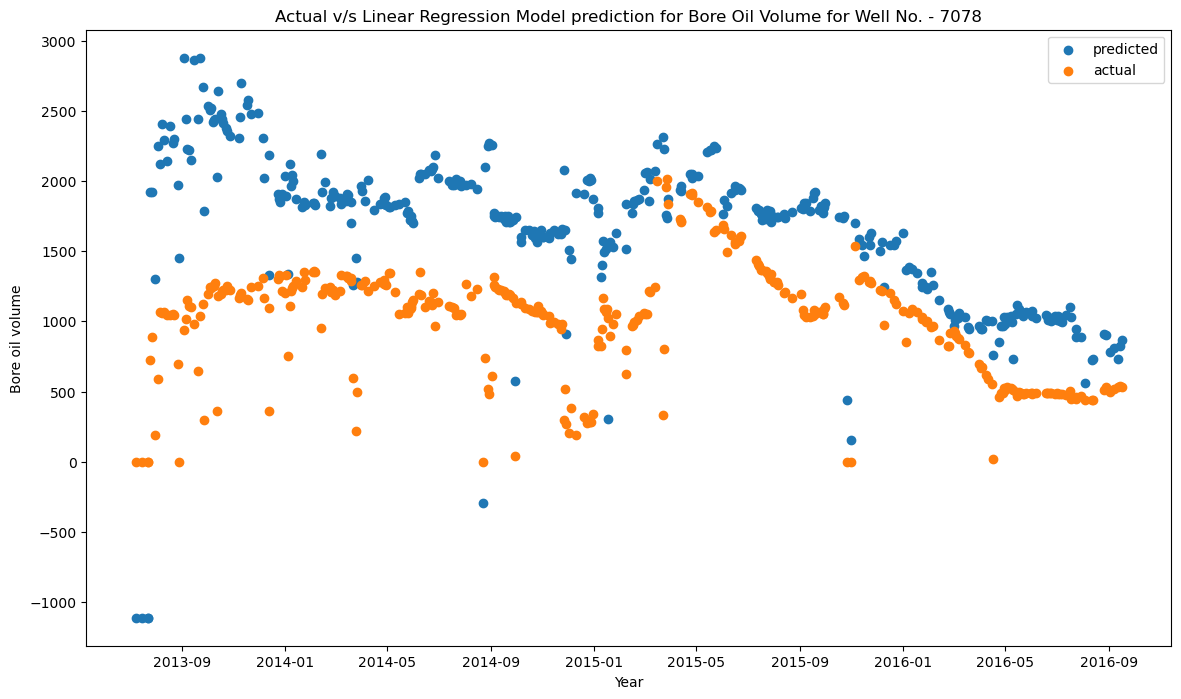

In [502]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_7078final)
plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 7078')

y_test_7078_final = y_test_7078['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))

In [503]:
y_pred = reg_all.predict(x_test_7078final)
y_test_7078_final = y_test_7078['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_7078_final, y_pred)
mae = mean_absolute_error(y_test_7078_final, y_pred)
r2 = r2_score(y_test_7078_final, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 640159.8969433844
MAE: 694.441306594009
R^2: -3.0140537511268324


The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is 0.698401477282882


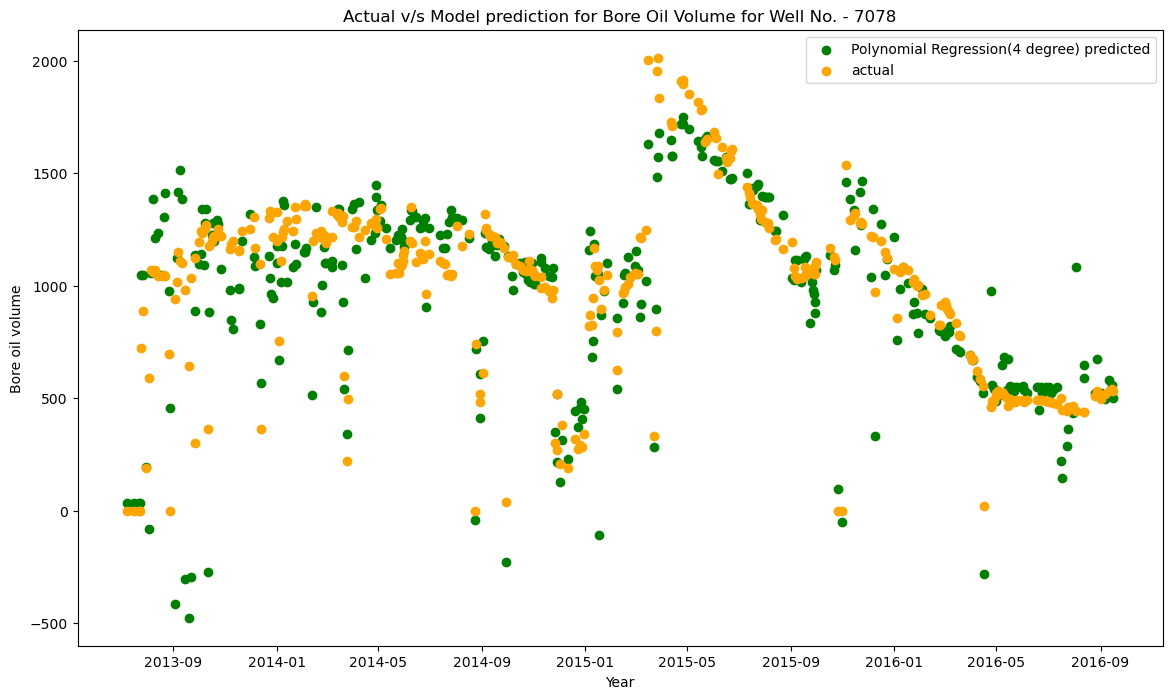

In [504]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_7078final)


x_pol_test_7078 = poly_reg.fit_transform(x_test_7078final)
y_poly_7078 = lin_reg.predict(x_pol_test_7078)

plt.style.use('default')
plt.figure(figsize = (14,8))
#plt.scatter(X_test_7078["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_poly_7078,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 7078')

#print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is", lin_reg.score(x_pol_test_7078,y_test_7078_final))

In [505]:
y_test_7078_final = y_test_7078['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_7078_final, y_poly_7078)
mae = mean_absolute_error(y_test_7078_final, y_poly_7078)
r2 = r2_score(y_test_7078_final, y_poly_7078)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 48098.827567186396
MAE: 133.06874467562952
R^2: 0.698401477282882


# Decision Tree

In [506]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train_final,y_train_final)


DecisionTreeRegressor()

In [507]:
y_predi = dec_tree.predict(x_test_final)

# Evaluacion del Modelo Decision Tree
#Score (Accuracy)

In [508]:
mse = mean_squared_error(y_test_final, y_predi)
mae = mean_absolute_error(y_test_final, y_predi)
r2 = r2_score(y_test_final, y_predi)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 59808.05919312169
MAE: 96.04380341880342
R^2: 0.9680686473367695


The R2 value for Decision Tree for oil volume production in well 7078 is 0.911168753030739


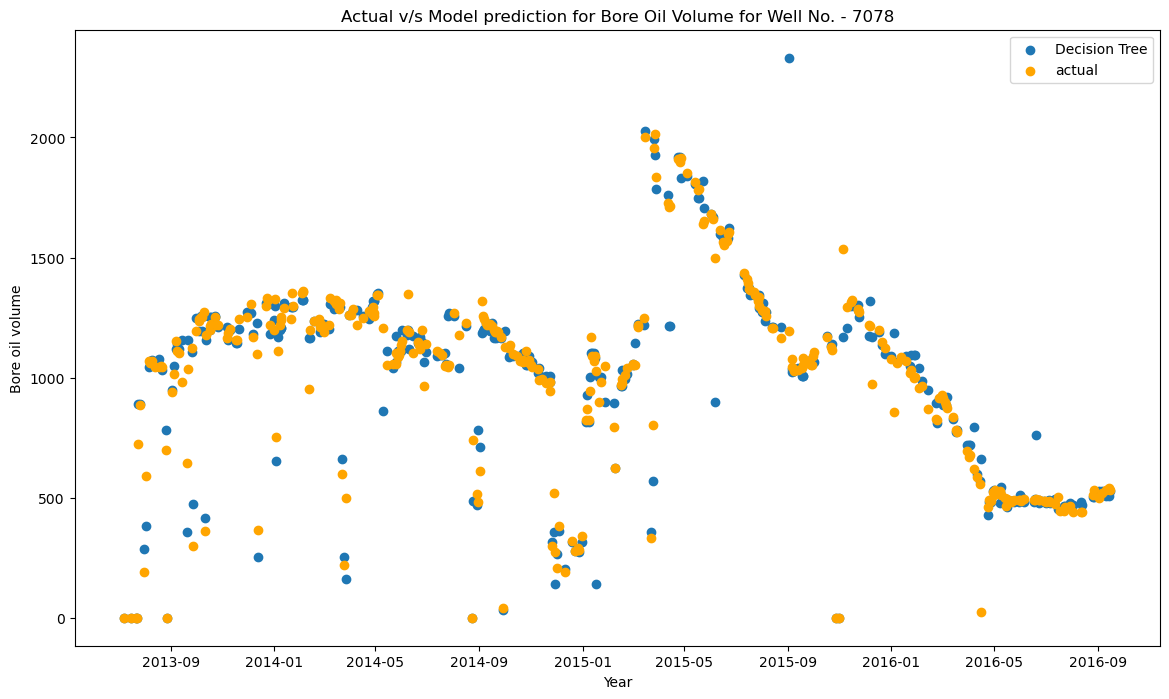

In [509]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_predicha_tree = dec_tree.predict(x_test_7078final)


plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_predicha_tree,label='Decision Tree')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 7078')

print("The R2 value for Decision Tree for oil volume production in well 7078 is", dec_tree.score(x_test_7078final,y_test_7078_final ))


In [510]:
y_test_7078_final = y_test_7078['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_7078_final,y_predicha_tree)
mae = mean_absolute_error(y_test_7078_final,y_predicha_tree)
r2 = r2_score(y_test_7078_final,y_predicha_tree)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 14166.77638888889
MAE: 50.772222222222226
R^2: 0.911168753030739


The R2 value for linear regression for oil volume production in well 5599 is 0.9683730773444632


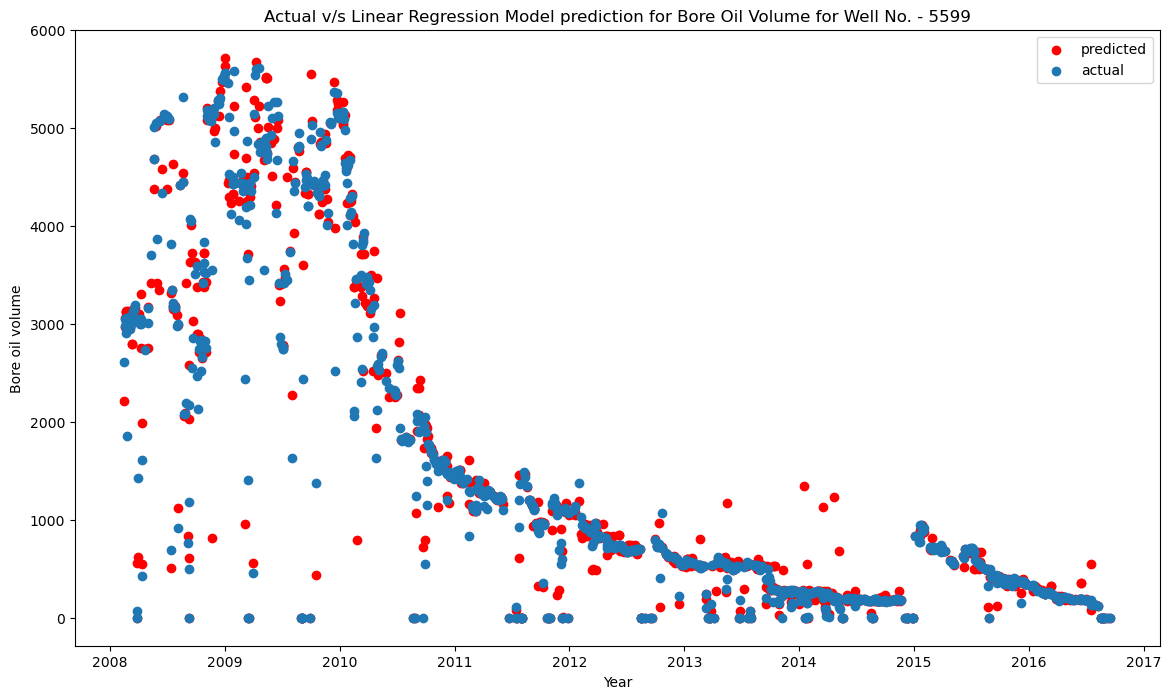

In [511]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_predic_tree = dec_tree.predict(x_test_5599final)
#plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_predic_tree,label='predicted',color='red')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", dec_tree.score(x_test_5599final,y_test_5599_final ))

In [512]:
y_test_5599_final = y_test_5599['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5599_final,y_predic_tree)
mae = mean_absolute_error(y_test_5599_final,y_predic_tree)
r2 = r2_score(y_test_5599_final,y_predic_tree)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 84653.91906759057
MAE: 115.51112326768781
R^2: 0.9683730773444632


The R2 value for Decision Tree Regression for oil volume production is 0.9682249862001138


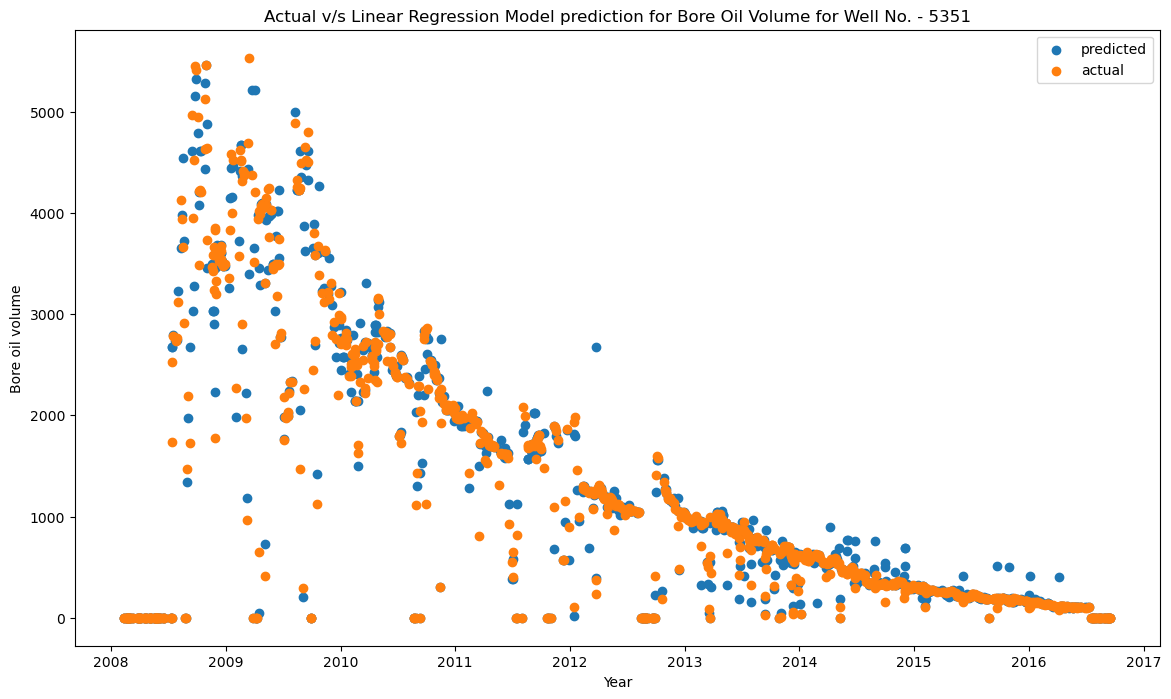

In [513]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred_tree = dec_tree.predict(x_test_5351final)
plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred_tree,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for Decision Tree Regression for oil volume production is", dec_tree.score(x_test_5351final,y_test_5351_final ))

In [514]:
y_test_5351_final = y_test_5351['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5351_final,y_pred_tree)
mae = mean_absolute_error(y_test_5351_final,y_pred_tree)
r2 = r2_score(y_test_5351_final,y_pred_tree)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 52908.87884615385
MAE: 94.40054945054945
R^2: 0.9682249862001138


# RandomForest

In [515]:
from sklearn.ensemble import RandomForestRegressor
modelo=RandomForestRegressor(n_estimators=10,random_state=19)
from sklearn import tree
import graphviz
import pydotplus

In [516]:
modelo.fit(x_train_final,y_train_final)

RandomForestRegressor(n_estimators=10, random_state=19)

In [517]:
# Obtener los árboles del Random Forest
arboles = modelo.estimators_

In [518]:
# Acceder a un árbol individual
arbol_1 = arboles[0]

In [519]:
# Crear una representación gráfica del árbol
dot_data = tree.export_graphviz(arbol_1, out_file=None,
                                feature_names=x_train_final.columns,
                                filled=True, rounded=True,
                                special_characters=True)

In [520]:
# Generar el gráfico del árbol
graph = pydotplus.graph_from_dot_data(dot_data)


In [521]:
# Mostrar el gráfico en Jupyter Notebook
#graphviz.Source(graph.to_string())

In [409]:
# Guardar la imagen en formato PNG

In [410]:
graph.write_png('arbol_decisionn.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.153269 to fit



True

In [411]:
from IPython.display import Image
import shutil

In [412]:
# Mostrar la imagen

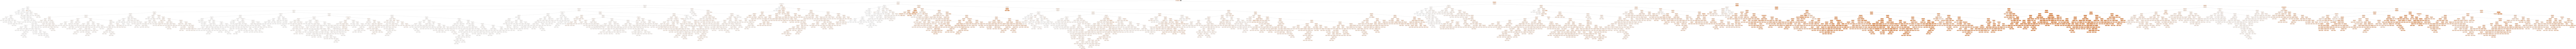

In [413]:
Image('arbol_decisionn.png')


In [414]:
# Descargar la imagen

In [415]:
#shutil.move('arbol_decisionn.png', 'C:\\Users\\CarlosDaniel\\OneDrive\\Documents\\arbol_decisionn.png')

# Evaluacion del modelo RandomForest

In [416]:
print(modelo.score(x_test_final,y_test_final))

0.9840410004593559


In [417]:
y_pre = modelo.predict(x_test_final)

In [418]:
mse = mean_squared_error(y_test_final, y_pre)
mae = mean_absolute_error(y_test_final, y_pre)
r2 = r2_score(y_test_final, y_pre)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 29891.523834157535
MAE: 77.80398340746555
R^2: 0.9840410004593559


The R2 value for Randon Forest for oil volume production in well 5599 is 0.9855958795249183


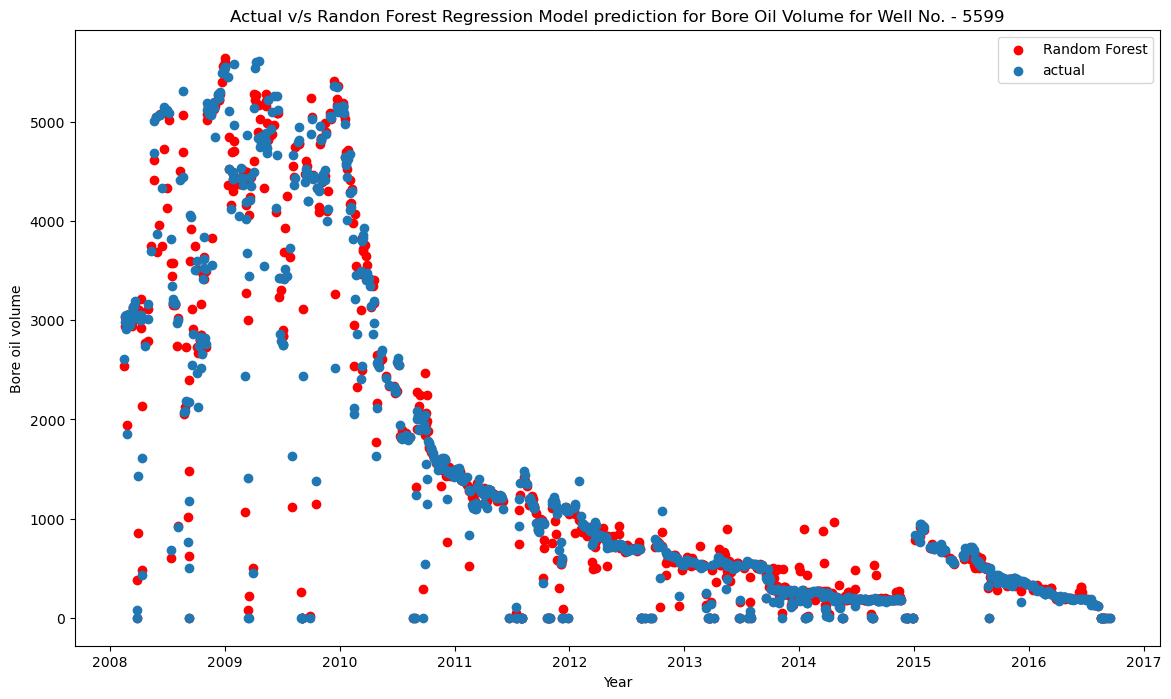

In [419]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_predic_random = modelo.predict(x_test_5599final)
plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_predic_random,label='Random Forest',color='red')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Randon Forest Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for Randon Forest for oil volume production in well 5599 is", modelo.score(x_test_5599final,y_test_5599_final ))
# Suponiendo que y_test_5599 es la variable de respuesta real y y_predic es la predicción del modelo
#y_test_5599_single = y_test_5599['BORE_OIL_VOL']  # Selecciona una sola columna de y_test_5599

#print("The R2 value for Random Forest for oil volume production in well 5599 is", r2_score(y_test_5599_final, y_predic))


In [433]:
y_test_5599_final = y_test_5599['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5599_final, y_predic_random)
mae = mean_absolute_error(y_test_5599_final, y_predic_random)
r2 = r2_score(y_test_5599_final, y_predic_random)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 38554.65997176034
MAE: 90.57944175263103
R^2: 0.9855958795249183


The R2 value for Random Forest for oil volume production in well 7078 is 0.9107840924859856


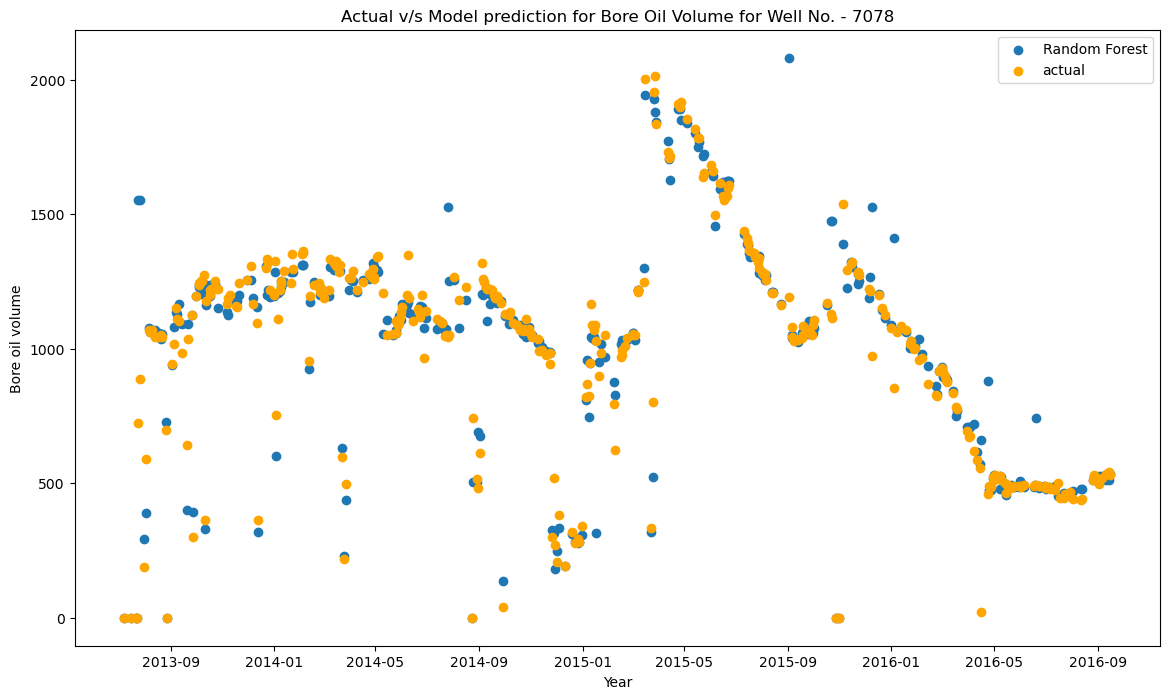

In [420]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_predicha_random = modelo.predict(x_test_7078final)


plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_predicha_random,label='Random Forest')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 7078')

print("The R2 value for Random Forest for oil volume production in well 7078 is", modelo.score(x_test_7078final,y_test_7078_final ))


In [434]:
y_test_7078_final = y_test_7078['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_7078_final, y_predicha_random)
mae = mean_absolute_error(y_test_7078_final,y_predicha_random)
r2 = r2_score(y_test_7078_final,y_predicha_random)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 14228.121918858023
MAE: 49.330824074074066
R^2: 0.9107840924859856


The R2 value for Decision Random Forest for oil volume production is 0.9835525424328636


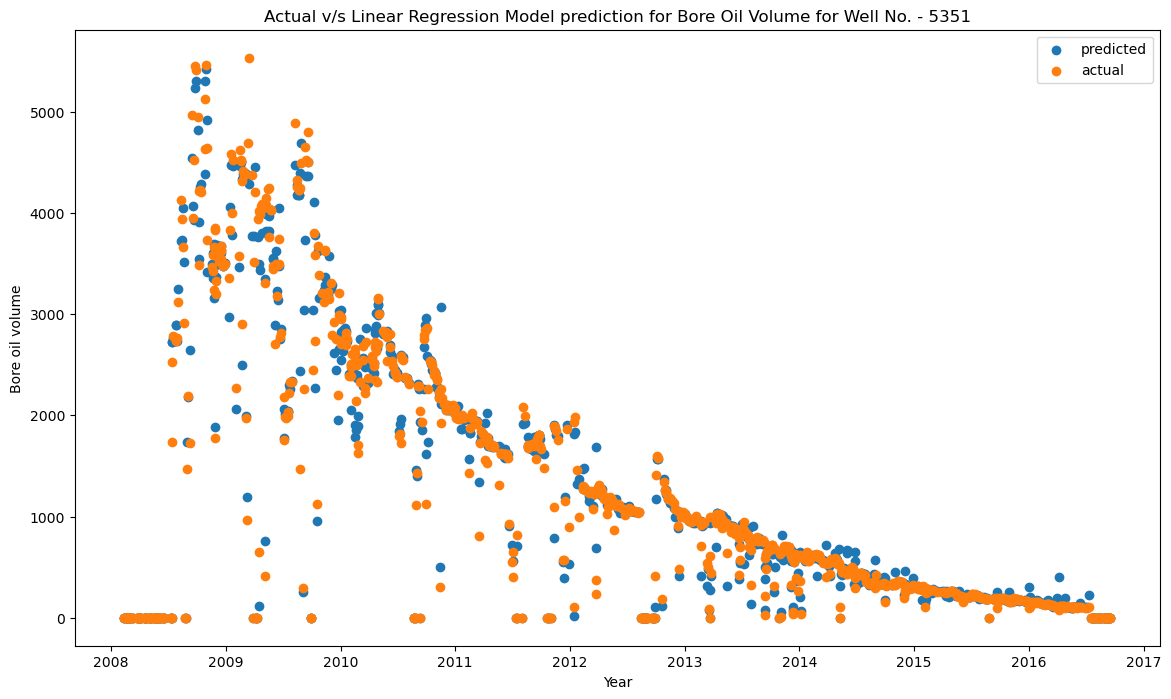

In [421]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred_random = modelo.predict(x_test_5351final)
plt.style.use('default')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred_random,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for Decision Random Forest for oil volume production is", modelo.score(x_test_5351final,y_test_5351_final ))

In [435]:
y_test_5351_final = y_test_5351['BORE_OIL_VOL'] # Selecciona una sola columna de y_test_5599
mse = mean_squared_error(y_test_5351_final,y_pred_random )
mae = mean_absolute_error(y_test_5351_final,y_pred_random )
r2 = r2_score(y_test_5351_final,y_pred_random)
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 27386.818625079366
MAE: 76.23647619047618
R^2: 0.9835525424328636
